### On a predictive modeling project, such as classification or regression, raw data typically cannot be used directly.
###  Machine learning algorithms require data to be numbers.
###  Some machine learning algorithms impose requirements on the data.
###  Statistical noise and errors in the data may need to be corrected.
###  Complex nonlinear relationships may be teased out of the data.

### Data Preparation
###  Data Cleaning: Identifying and correcting mistakes or errors in the data.
###  Feature Selection: Identifying those input variables that are most relevant to the task.
###  Data Transforms: Changing the scale or distribution of variables.
###  Feature Engineering: Deriving new variables from available data.
###  Dimensionality Reduction: Creating compact projections of the data.


### Topics:
### 1. Common Data Preparation Tasks
### 2. Data Cleaning
### 3. Feature Selection
### 4. Data Transforms
### 5. Feature Engineering
### 6. Dimensionality Reduction

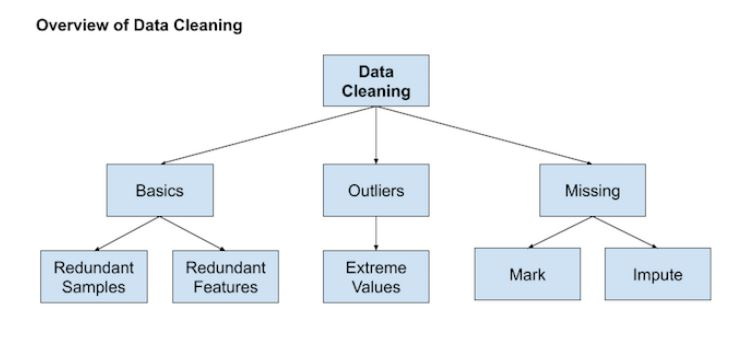

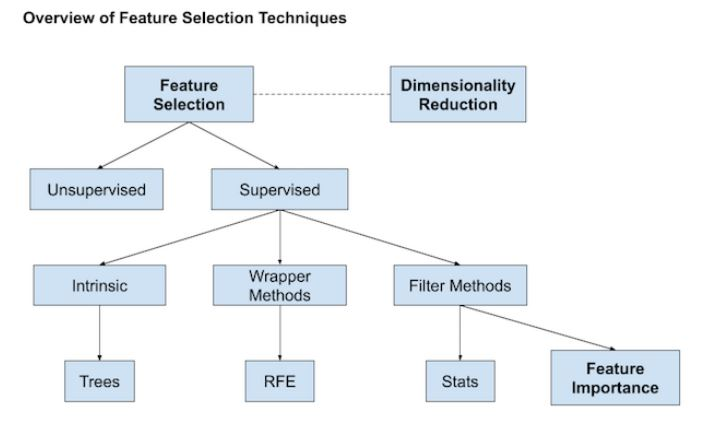

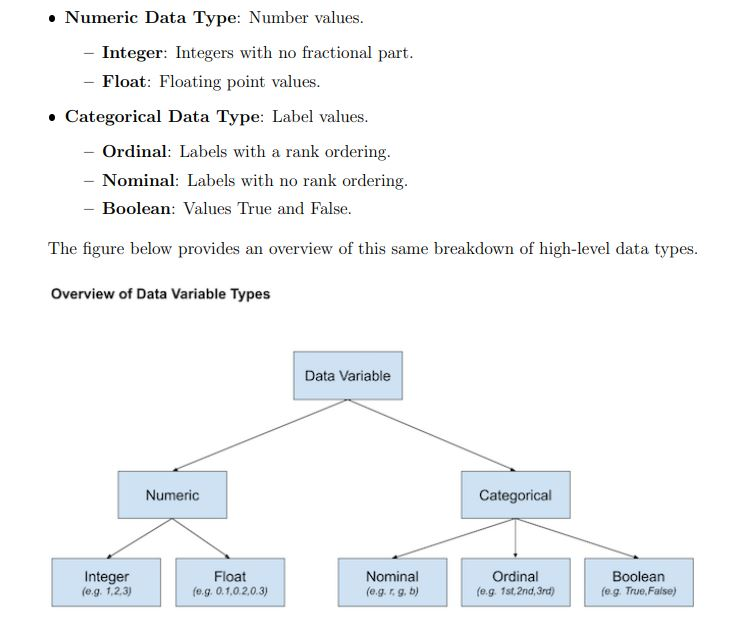

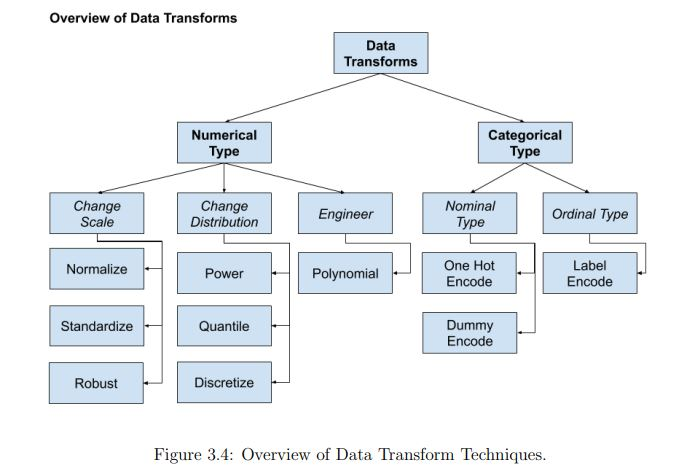

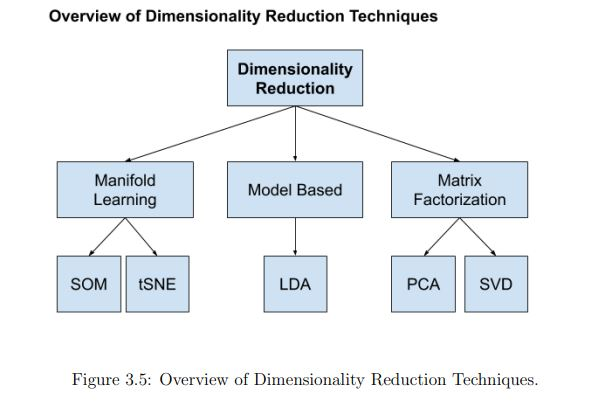

# Data Preparation Without Data Leakage

###  Naive application of data preparation methods to the whole dataset results in data leakage that causes incorrect estimates of model performance.
###  Data preparation must be prepared on the training set only in order to avoid data leakage.
###  How to implement data preparation without data leakage for train-test splits and k-fold cross-validation in Python.

## Data Preparation With Train and Test Sets

In [31]:
#Train-Test Evaluation With Naive Data Preparation
# naive approach to normalizing the data before splitting the data and evaluating the model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

Accuracy: 84.848


In [32]:
# Train-Test Evaluation With Correct Data Preparation
# correct approach for normalizing the data after the data is split before the model is evaluated
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,random_state=7)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define the scaler
scaler = MinMaxScaler()
# fit on the training dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test = scaler.transform(X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))


Accuracy: 85.455


## Data Preparation With k-fold Cross-Validation

In [35]:
#Cross-Validation Evaluation With Naive Data Preparation
# naive data preparation for model evaluation with k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# standardize the dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# define the model
model = LogisticRegression()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

Accuracy: 85.300 (3.607)


In [36]:
#Cross-Validation Evaluation With Correct Data Preparation
# correct data preparation for model evaluation with k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression()))
pipeline = Pipeline(steps=steps)
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))


Accuracy: 85.433 (3.471)
